# Climate Data: CO2 and Snow Accumulation

This lab accompanies a lecture for Berkeley's Data 100 that covers the fundamental physical mechanisms behind global warming and analyzes CO2 and ocean temperature data.

Authors: Fernando Pérez and [Dr. Chelle Gentemann](https://cgentemann.github.io).

In [1]:
# Run this cell to set up your notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

# more readable exceptions
%pip install --quiet iwut
%load_ext iwut
%wut on

Note: you may need to restart the kernel to use updated packages.


# Loading the Mauna Loa CO2 data

In [2]:
DATA_DIR = Path('./data')
#DATA_DIR = Path.home()/Path('shared/climate-data')
co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file)
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


In [3]:
# get rid of missing values that are set to -99.99 and then drop from the dataset
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19


# Exploring the annual anomaly

## Variability in Annual Cycle

In the northern hemisphere, plants take up CO2 in the spring/summer then release it in the fall/winter, so the release is getting stronger.

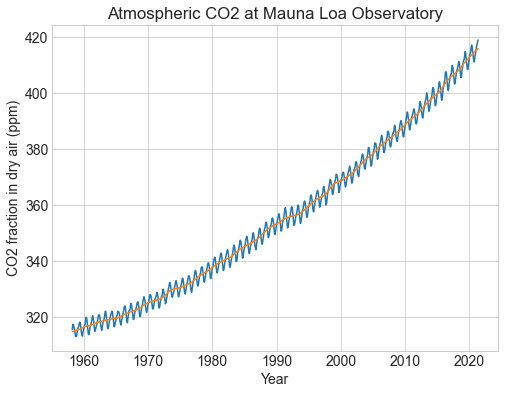

In [4]:
plt.plot("fraction_date", "c02", data=data);
plt.plot("fraction_date", "data_adjusted_seasonally_fit", data=data);
plt.title('Atmospheric CO2 at Mauna Loa Observatory');
plt.xlabel('Year');
plt.ylabel('CO2 fraction in dry air (ppm)');

## Estimate Increase in Amplitude of Annual Cycle

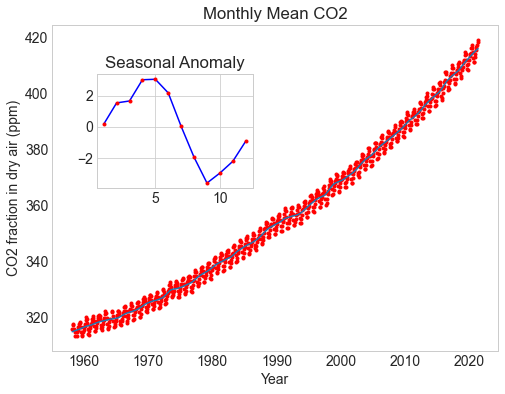

In [5]:
# calculate the annual cycle using groupby
annual = data.groupby(data.month).mean()
# calculate the anomaly
anomaly = annual - annual.mean()

# plot
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
axin1.plot(anomaly.c02, "b")
axin1.plot(anomaly.c02, "r.")
axin1.set_title("Seasonal Anomaly");

## Monthly Cycle For All Years
CO2 emission follows a similar monthly cycle each year. There is a slight increase around May and a dip around October. 

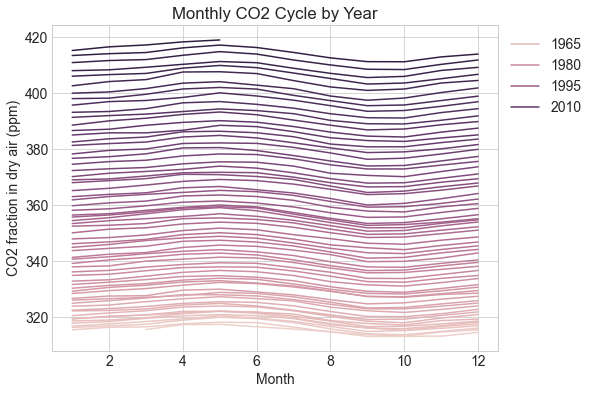

In [6]:
sns.lineplot(data=data, x="month", y="c02", hue="year");
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Monthly CO2 Cycle by Year');
plt.xlabel('Month');
plt.ylabel('CO2 fraction in dry air (ppm)');

## Monthly Anomaly Averaging Across Years

In [7]:
def detrend(f):
    det_xarr = f - f.mean()
    det_xarr['month'] = f['month']
    return det_xarr

c02anomaly = data.groupby('year').apply(detrend)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]
monthly_anomaly

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


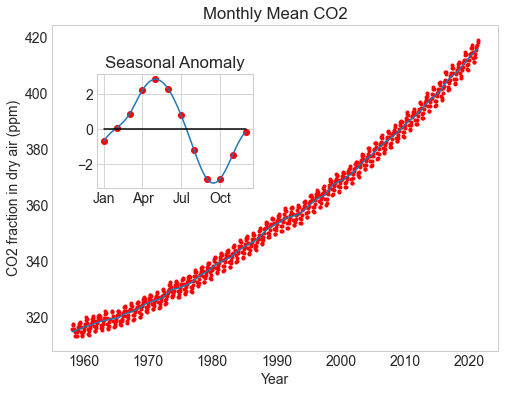

In [8]:
from scipy.interpolate import CubicSpline

fig, ax = plt.subplots()

# calculate the annual cycle using groupby
annual = data.groupby(data.month).mean()
# calculate the anomaly
anomaly = annual - annual.mean()

# plot
ax.plot("fraction_date", "data_filled", "r.", data=data);
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data);
ax.set_xlabel("Year");
ax.set_ylabel("CO2 fraction in dry air (ppm)");
ax.set_title("Monthly Mean CO2");
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
cs = CubicSpline(monthly_anomaly.index.values, monthly_anomaly.c02)
xs = np.arange(1, 12.1, 0.1)
axin1.plot(monthly_anomaly.index.values, monthly_anomaly.c02, 'o', label='data', color='r');
axin1.plot(xs, cs(xs), label="S");
axin1.plot(xs, np.ones(len(xs)) * np.mean(monthly_anomaly.c02), color='black');
axin1.set_title("Seasonal Anomaly");
axin1.set_xticks([1, 4, 7, 10]);
axin1.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct']);

# Exploring Snow Accumulation with ERA 5

In [9]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

monthly_2deg_path = DATA_DIR / "era5_snow_monthly_2deg_aws_v20210920.nc"

# Full dataset
# monthly_2deg_path = DATA_DIR / "era5_monthly_2deg_aws_v20210920.nc"

ds = xr.open_dataset(monthly_2deg_path)
# ds
snow = ds.snow_density
# snow

/Users/eugenia/opt/anaconda3/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


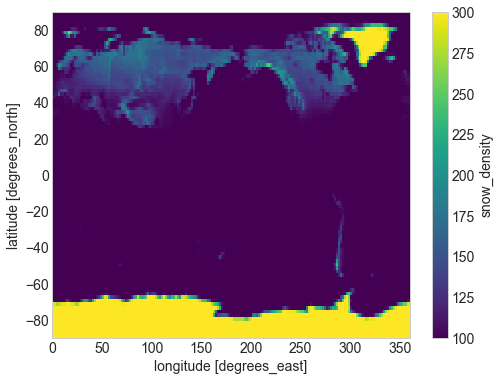

In [10]:
mean_map = ds.mean("time")  # takes the mean across all variables in ds
mean_map.snow_density.plot();

## Snow Accumulation Peaks in Summer and Winter of 2000

There is more snow across the globe in February from snowfall in the winter season and less in August from warm weather in the summer. Greenland and Antarctica's snow density was similar both times of the year

### February 2000

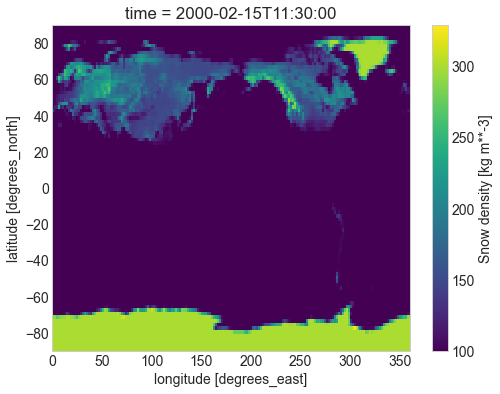

In [11]:
snow.sel(time='2000-02').plot();

### August 2000

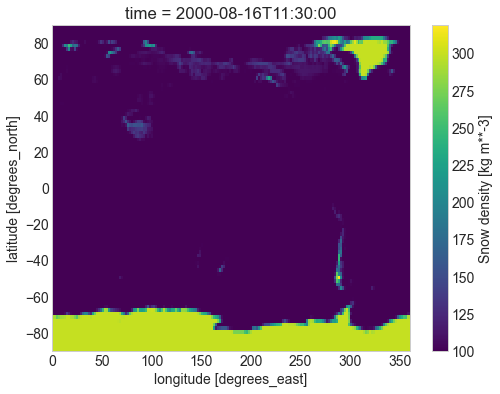

In [12]:
snow.sel(time='2000-08').plot();

## Peaks in Northern Hemisphere

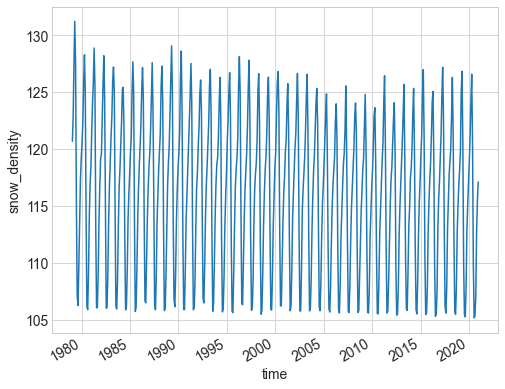

In [13]:
t_snow_north = snow.where(snow.latitude > 0, drop=True).mean('latitude').mean('longitude')
t_snow_north.plot();

## Peaks in Southern Hemisphere

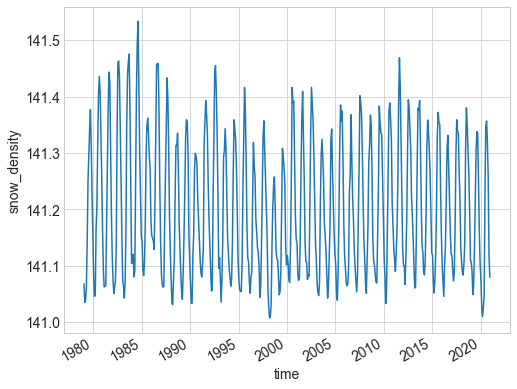

In [14]:
t_snow_south = snow.where(snow.latitude < 0, drop=True).mean('latitude').mean('longitude')
t_snow_south.plot();

## Snow Cycle in Southern Hemisphere in 2000
Snow density peaks at around August and is lowest around May of 2000 in the Southern Hemisphere.

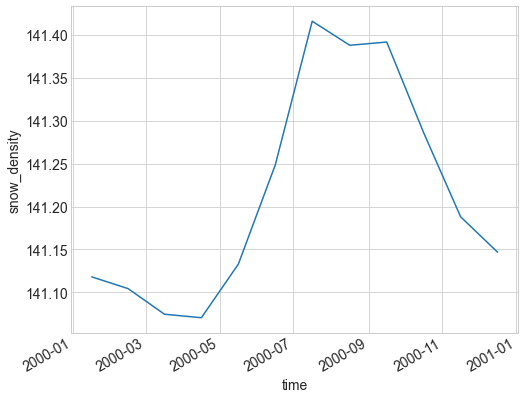

In [15]:
t_snow_south.sel(time='2000').plot();

## Maximum and Minimum Snow Accumulation in Southern Hemisphere

In [16]:
import datetime as dt

def extract_peaks(snow_data):
    years = np.arange(1979, 2021).astype(str)
    peaks = []
    
    for y in years:
        snow_sel = snow_data.sel(time=y)
        min_date = pd.to_datetime(snow_sel.idxmin().values)
        max_date = pd.to_datetime(snow_sel.idxmax().values)
        min_dayofyear = int(snow_sel.idxmin().dt.dayofyear)
        max_dayofyear = int(snow_sel.idxmax().dt.dayofyear)
        min_snow = float(snow_sel.min())
        max_snow = float(snow_sel.max())
        amplitude = max_snow - min_snow
        vals = [y, min_date, max_date, min_dayofyear, max_dayofyear, min_snow, max_snow, amplitude]
        peaks.append(vals)
        
    return pd.DataFrame(peaks, columns = 
                       ['year', 'min_date', 'max_date', 'min_dayofyear', 
                        'max_dayofyear', 'min_snow', 'max_snow', 'amplitude'])

peaks_south = extract_peaks(t_snow_south)
peaks_south.head()

,year,min_date,max_date,min_dayofyear,max_dayofyear,min_snow,max_snow,amplitude
0,1979,1979-02-14 23:30:00,1979-09-15 23:30:00,45,258,141.034744,141.377045,0.342300
1,1980,1980-02-15 11:30:00,1980-08-16 11:30:00,46,229,141.045639,141.436050,0.390411
2,1981,1981-02-14 23:30:00,1981-08-16 11:30:00,45,228,141.062637,141.443466,0.380829
3,1982,1982-02-14 23:30:00,1982-08-16 11:30:00,45,228,141.050476,141.463150,0.412674
4,1983,1983-03-16 11:30:00,1983-09-15 23:30:00,75,258,141.042572,141.475235,0.432663


### What day of the year do the min and max happen?

Maximum snow accumulation occurs around the range of days 200 and 250, which is July through September. The minimum occurs around the range of days 50 and 100, which is February through April.

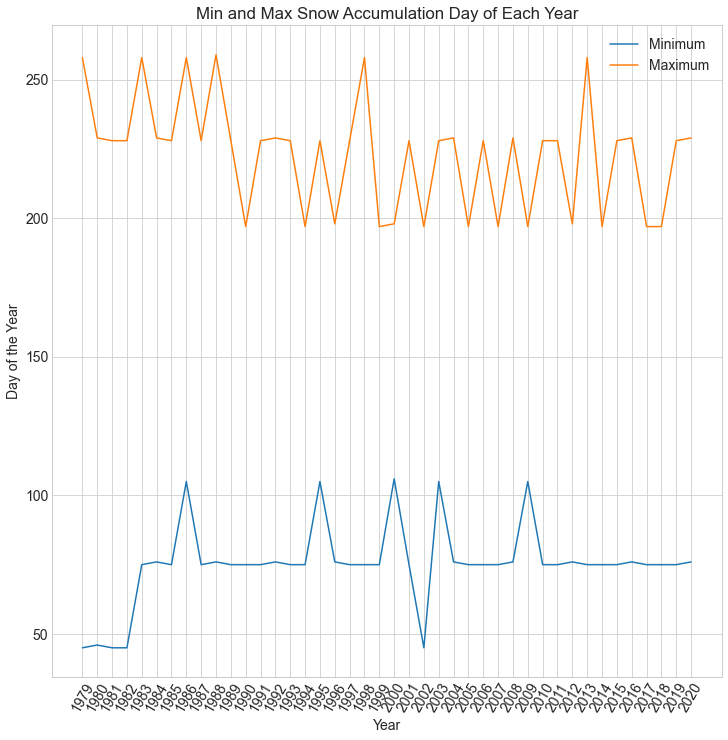

In [17]:
plt.figure(figsize=(12, 12))
plt.plot('year', 'min_dayofyear', data=peaks_south);
plt.plot('year', 'max_dayofyear', data=peaks_south);
plt.legend(['Minimum', 'Maximum']);
plt.title('Min and Max Snow Accumulation Day of Each Year');
plt.xlabel('Year');
plt.ylabel('Day of the Year');
plt.xticks(rotation=60);

### What is the min and max amount of snow at those times?
Maximum snow density ranges from 142.25 to 141.55 and minimum 141 to 141.12.

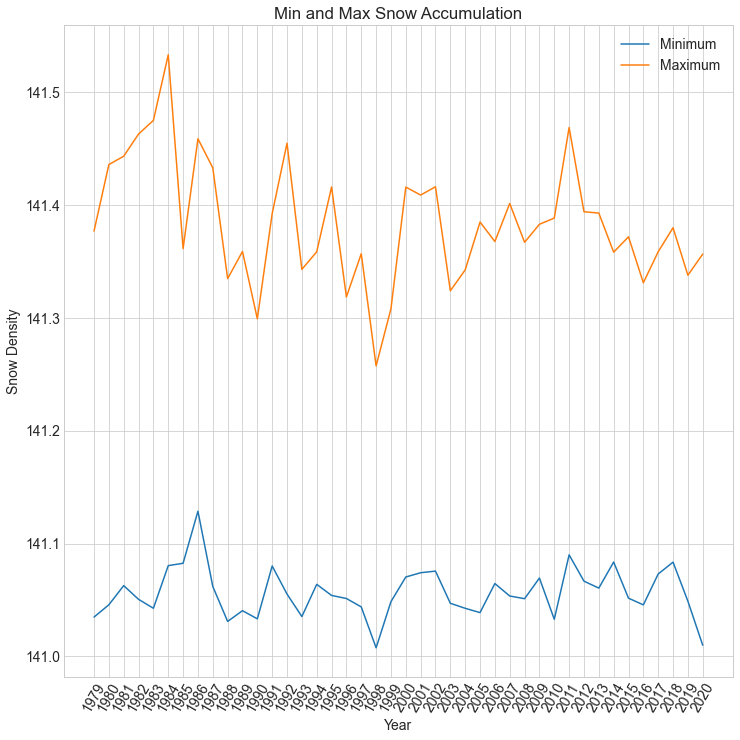

In [18]:
plt.figure(figsize=(12, 12))
plt.plot('year', 'min_snow', data=peaks_south);
plt.plot('year', 'max_snow', data=peaks_south);
plt.legend(['Minimum', 'Maximum']);
plt.title('Min and Max Snow Accumulation');
plt.xlabel('Year');
plt.ylabel('Snow Density');
plt.xticks(rotation=60);

### Minimum Snow Accumulation

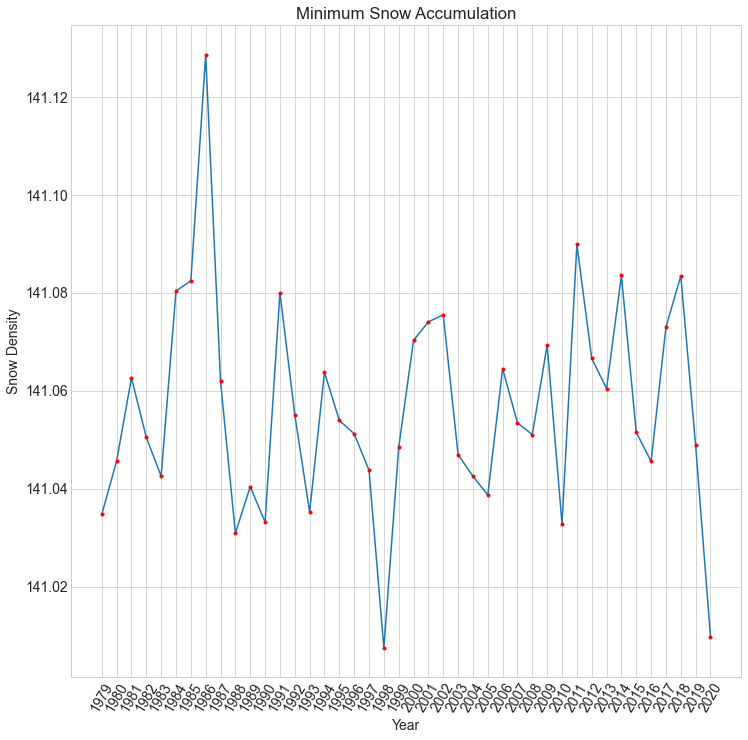

In [19]:
plt.figure(figsize=(12, 12))
plt.plot('year', 'min_snow', data=peaks_south);
plt.plot('year', 'min_snow', 'r.', data=peaks_south);
plt.title('Minimum Snow Accumulation');
plt.xlabel('Year');
plt.ylabel('Snow Density');
plt.xticks(rotation=60);

### Maximum Snow Accumulation

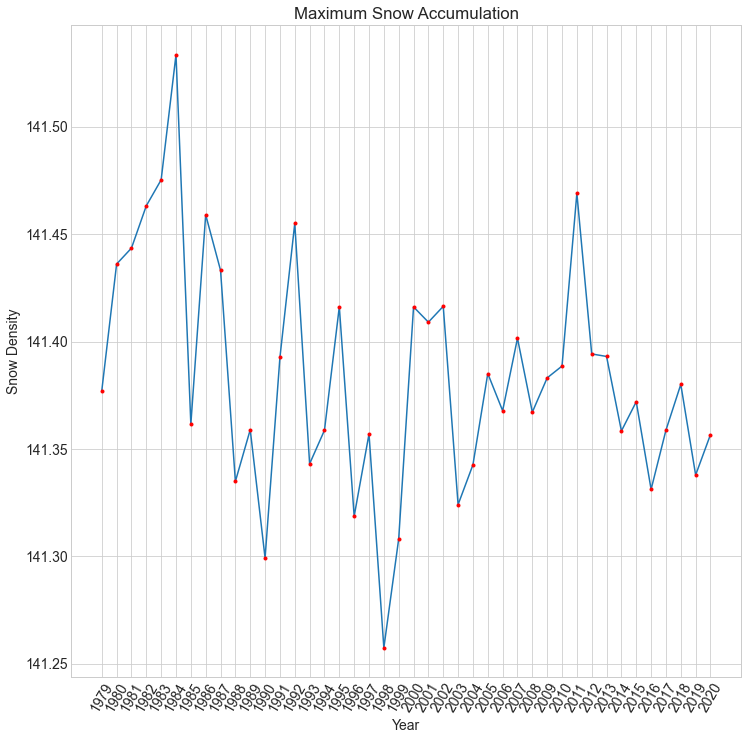

In [20]:
plt.figure(figsize=(12, 12))
plt.plot('year', 'max_snow', data=peaks_south);
plt.plot('year', 'max_snow', 'r.', data=peaks_south);
plt.title('Maximum Snow Accumulation');
plt.xlabel('Year');
plt.ylabel('Snow Density');
plt.xticks(rotation=60);